In [2]:
#Importing standard libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Increasing the number of rows and columns shown since database has 65 columns
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Kepler Exoplanet Search Results

In [3]:
# Importing data
kepler = pd.read_csv('../datasets/cumulative.csv')

In [4]:
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Since there is a lot of columns, we'll first see which ones we need to work with and drop the rest. Once that is done, we can start looking at the  dtypes and NaN values.

### Dropping columns

In [6]:
# Removing columns with no valuable information for the project
kepler.drop(['rowid', 'kepoi_name', 'kepid', 'koi_score', 'koi_kepmag', 'koi_fpflag_nt', 'koi_tce_delivname', 
             'koi_fpflag_ss', 'koi_tce_plnt_num', 'koi_model_snr', 'koi_time0bk', 'koi_fpflag_co', 'koi_fpflag_ec', 
             'koi_teq_err1', 'koi_teq_err2', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 
             'koi_time0bk_err2', 'koi_impact_err1',  'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 
             'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1', 
             'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 
             'koi_srad_err1', 'koi_srad_err2'], axis=1, inplace=True)


### NaN values

In [20]:
# Checking the number of NaNs on the columns left
kepler.isnull().sum()

kepler_name         7270
koi_disposition        0
koi_pdisposition       0
koi_period             0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_steff            363
koi_slogg            363
koi_srad             363
ra                     0
dec                    0
dtype: int64

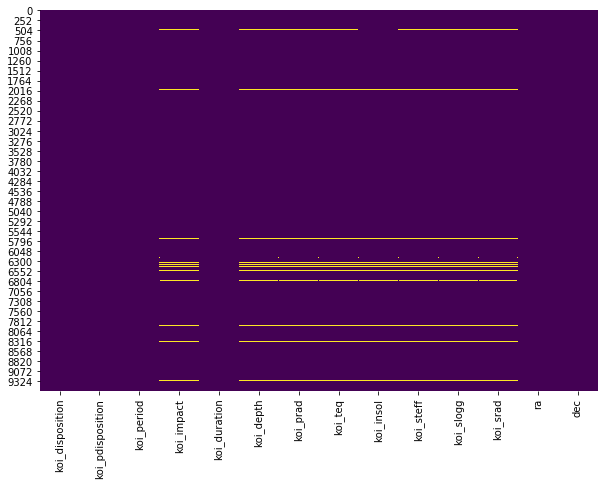

In [8]:
# Visualizing the NaN values left
plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar = False, cmap='viridis')

We will remove 'kepler_name' column for having a high number of null values. We will still have 'kepoi_name' for identification of the Kepler detection.

In [7]:
kepler.drop('kepler_name', axis=1, inplace=True)

# Refresh previous windows to see the results

Keeping the rest of the rows with Nans since they are only >300 rows of missing information out of >9K. If we remove them we will loose information on the other columns that could be useful later.

### Renaming columns

In [23]:
# For clarity
kepler.rename(columns={'ra': 'right_ascension', 'dec': 'declination', 'koi_period': 'orb_period'}, inplace=True)

In [24]:
# Removing 'koi' from all the column names to make it easier to read

cols = kepler.columns
new_cols = []

for name in cols:
    if name.startswith('koi_'):
        name = name.replace('koi_', '')
        new_cols.append(name)
    else:
        new_cols.append(name)
        
kepler.columns = new_cols

In [25]:
kepler.head()

,disposition,pdisposition,orb_period,impact,duration,depth,prad,teq,insol,steff,slogg,srad,right_ascension,declination
0,CONFIRMED,CANDIDATE,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,291.93423,48.141651
1,CONFIRMED,CANDIDATE,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,291.93423,48.141651
2,FALSE POSITIVE,FALSE POSITIVE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,297.00482,48.134129
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,285.53461,48.285210
4,CONFIRMED,CANDIDATE,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,288.75488,48.226200


Now that we've removed all the information we want, let's check if the information left is the right **type** to be able to start working


In [26]:
kepler.dtypes

disposition         object
pdisposition        object
orb_period         float64
impact             float64
duration           float64
depth              float64
prad               float64
teq                float64
insol              float64
steff              float64
slogg              float64
srad               float64
right_ascension    float64
declination        float64
dtype: object

All the columns expected to be numeric are float64 and the ones expected to be strings are object, so everything is correct.  
Next, we will get only the numeric data of the dataframe to visualize outliers with boxplots.

In [9]:
kepler_numeric = kepler._get_numeric_data()
kepler_numeric.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,ra,dec
0,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,291.93423,48.141651
1,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,291.93423,48.141651
2,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,297.00482,48.134129
3,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,285.53461,48.285210
4,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,288.75488,48.226200


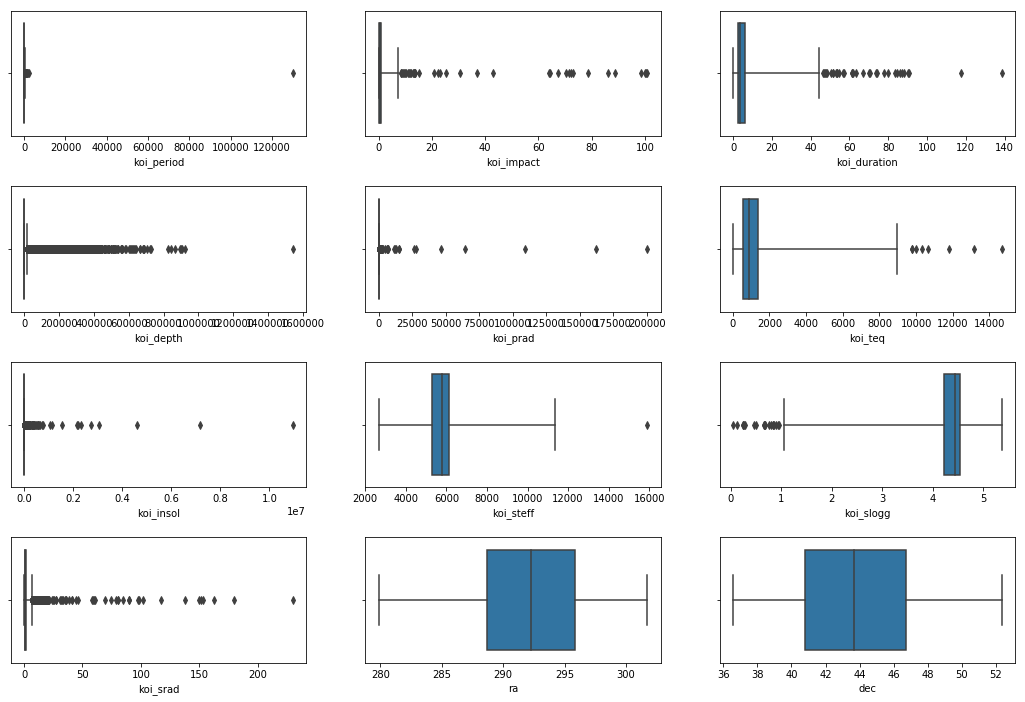

In [10]:
# Visualizing the outliers with boxplots
f = plt.figure(figsize=(18, 12))
i=1
import math
for col in kepler_numeric.columns:
    subplot = f.add_subplot(math.ceil(kepler_numeric.shape[1]/3),3,i)
    sns.boxplot(x=kepler_numeric[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4)
plt.show()

Since the information on the dataset has already been through a scientific test to enter the dataset, we won't remove the outliers. If they interfere with anything at any point in the future, then we will deal with them.

### 2.4. Saving CSV

In [29]:
kepler.to_csv('../datasets/kepler.csv', index=False)

In [30]:
#from sqlalchemy import create_engine

#driver = 'mysql+pymysql:'
#user = 'root'
#password = ''
#ip = '35.198.146.55'
#database = 'exoplanets'
#connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
#engine = create_engine(connection_string)

#kepler.to_sql('kepler', con=engine, if_exists='replace')

OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user 'root'@'85.51.51.30' (using password: NO)") (Background on this error at: http://sqlalche.me/e/e3q8)